# MVP de Machine Learning

## Aluno: Paulo Vitor Lima Souza


## 1. Definição do Problema

O dataset utilizado neste projeto será o **Maternal Health Risk**. Os dados correspondentes foram coletados de diferentes hospitais, clínicas comunitárias e unidades de saúde materna de áreas rurais de Bangladesh por meio do sistema de monitoramento de risco baseado em IoT.

Seu objetivo é classificar/avaliar a saúde materna com base em suas características de triagem como idade, pressão arterial e temperatura.
Todos esses atributos são os fatores de risco significativos na avaliação da mortalidade materna. Classificam, assim, o grau de risco da saúde materna, resultando em níveis alto, médio ou baixo.

O presente trabalho trata-se de um modelo de aprendizado supervisionado com o uso de conjuntos de dados rotulados para treinar algoritmos que classifiquem o grau de risco da saúde materna conforme os atributos de entrada.

---

Dataset obtido em: https://archive.ics.uci.edu/dataset/863/maternal+health+risk

---
**Informações sobre os atributos:**

Variáveis de entrada:
1. **Age** - Idade (anos), em que a mulher encontra-se grávida
2. **SystolicBP** - Valor máximo da Pressão Arterial (mmHg)
3. **DiastolicBP** - Menor valor da Pressão Arterial (mmHg)
4. **BS** - Níveis de glicose no sangue expressos em termos de concentração molar (mmol/L)
5. **BodyTemp** - Temperatura Corpórea (ºF - Fahrenheit)
6. **HeartRate** - Frequência cardíaca normal em repouso (batimentos por minuto - bpm)

Variável de saída
7. **RiskLevel** - Nível de Intensidade de Risco Previsto durante a gestação considerando os atributos de entrada (alto, médio, baixo).


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Utilizou-se o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv disponível online. O arquivo possui cabeçalho de dados.

Com o dataset carregado, explorou-se os dados quanto a ordenação, balanceamento, *outliers* e atributos faltantes.

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/paulovlsouza/cienciadedados/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv"

# O dataset possui cabeçalho, não sendo necessário determinar as colunas
# Lê o arquivo utilizando as colunas existentes e respectivo cabeçalho. O arquivo possui , como delimitador.
dataset = pd.read_csv(url,skiprows=0,delimiter=',')

In [ ]:
# Verificando o carregamento do dataset. Linhas iniciais.
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# Verificando o carregamento do dataset. Linhas finais.
dataset.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
print(dataset.shape)

(1014, 7)


In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [ ]:
# Mostra as 15 primeiras linhas do dataset.
dataset.head(15)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [ ]:
# Mostra as 15 últimas linhas do dataset
dataset.tail(15)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
999,40,120,95,11.0,98.0,80,high risk
1000,12,90,60,11.0,102.0,60,high risk
1001,60,120,85,15.0,98.0,60,high risk
1002,55,140,95,19.0,98.0,77,high risk
1003,50,130,100,16.0,98.0,76,high risk
1004,13,90,65,9.0,101.0,80,high risk
1005,17,90,65,7.7,103.0,67,high risk
1006,17,85,60,6.3,102.0,86,high risk
1007,40,120,75,7.7,98.0,70,high risk
1008,48,120,80,11.0,98.0,88,high risk


In [ ]:
# Verificando o tipo de dataset de cada atributo
dataset.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


In [ ]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Assim, pelo resumo estatístico, percebe-se que não há dados faltantes.

Por sua vez, percebem-se que há casos em que a variável *age* registra casos de gravidez na infância e uma amplitude entre 10 - 70 anos. A temperatura corpórea *BodyTemp*, tem registro médio de 98 ºF que equivalem à temperatura padrão 37º C. Há registros de batimentos cardíacos (*HeartRate*) baixíssimos com mínimo de 7 bpm (podendo ser um item a avaliar na distribuição).

A seguir, verifica-se o balanceamento das classes do dataset, com uma concentração maior em *low risk*.


In [ ]:
# distribuição das classes
print(dataset.groupby('RiskLevel').size())

RiskLevel
high risk    272
low risk     406
mid risk     336
dtype: int64


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset.

Percebe-se que alguns atributos possuem a distribuição concentrada nos valores/intervalos padrão dos sinais vitai de temperatura, pressão, batimentos e nível de glicose.

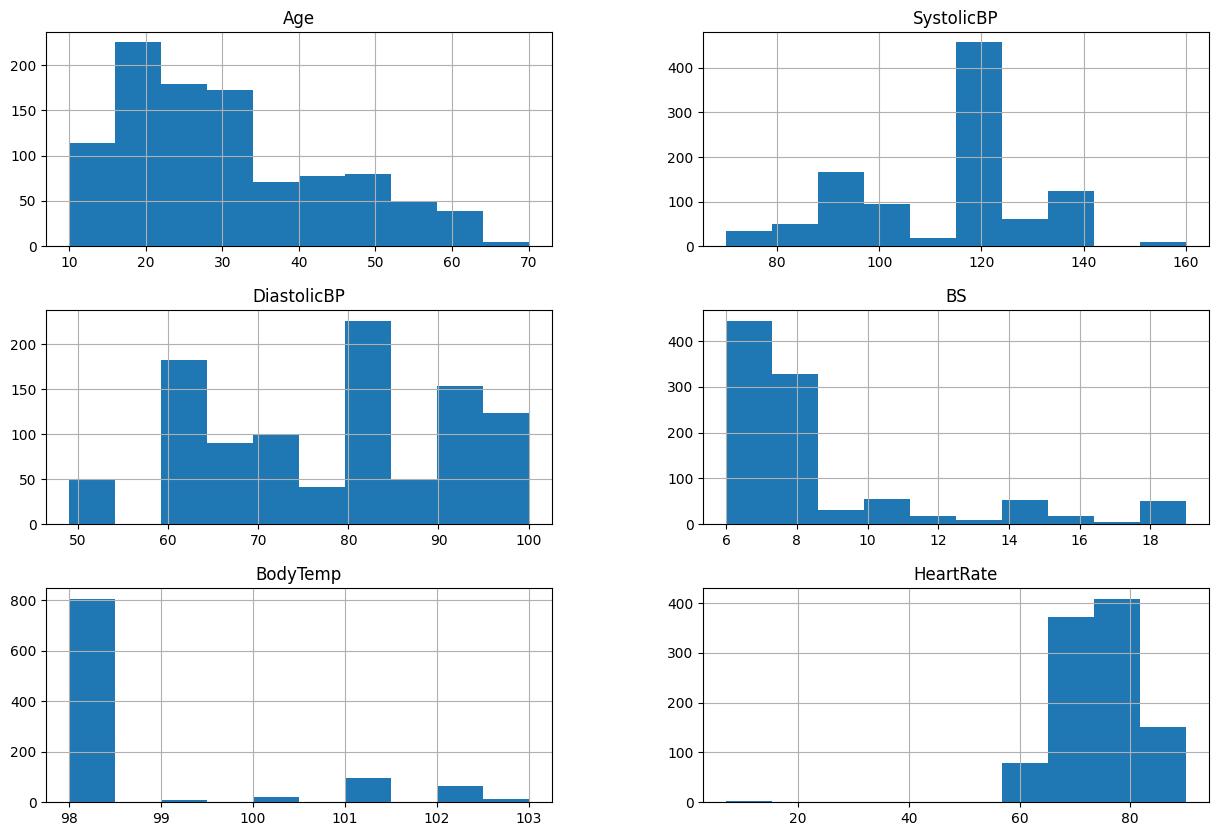

In [ ]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

A seguir, utiliza-se 0 Gráfico de Densidade, ou Density Plot, bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como o histograma, cria-se um density plot para cada atributo do dataset.

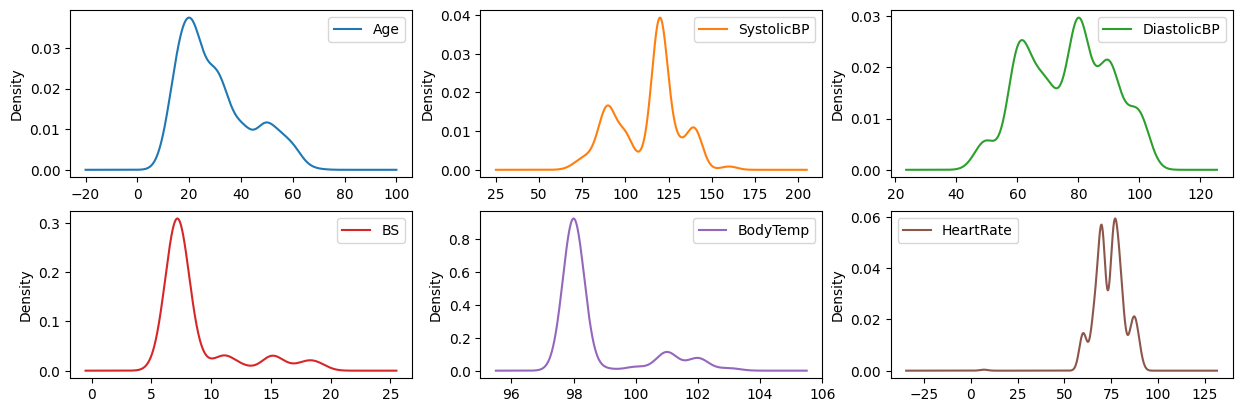

In [ ]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (15,10))
plt.show()

Utiliza-se na próxima análise os Gráficos de Boxplot.

No **boxblot**, a linha no centro (verde) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

Vemos pelas distribuições, a concentração de características dos sinais vitais médios. Ressalta-se a concentração da *BodyTemp* e *BS*. Os gráficos destacam ainda os outlines em cada uma das medidas, em especial o da frequência cardíaca citada anteriormente.

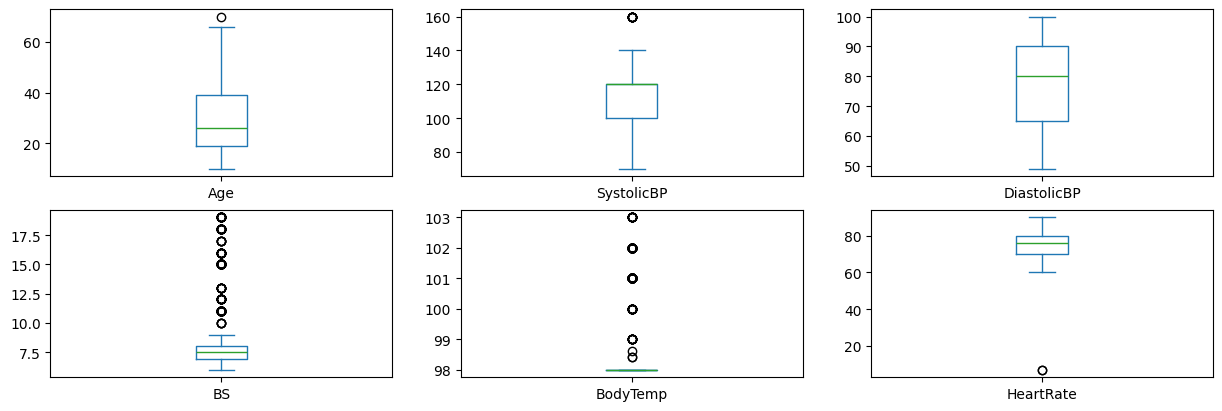

In [ ]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais


    

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Exibe-se a seguir um para cada par de atributos dos dataset, usando o Seaborn.

Nas diagonais, a relação entre o mesmo atributo possui a distribuição semelhante ao histograma desta.

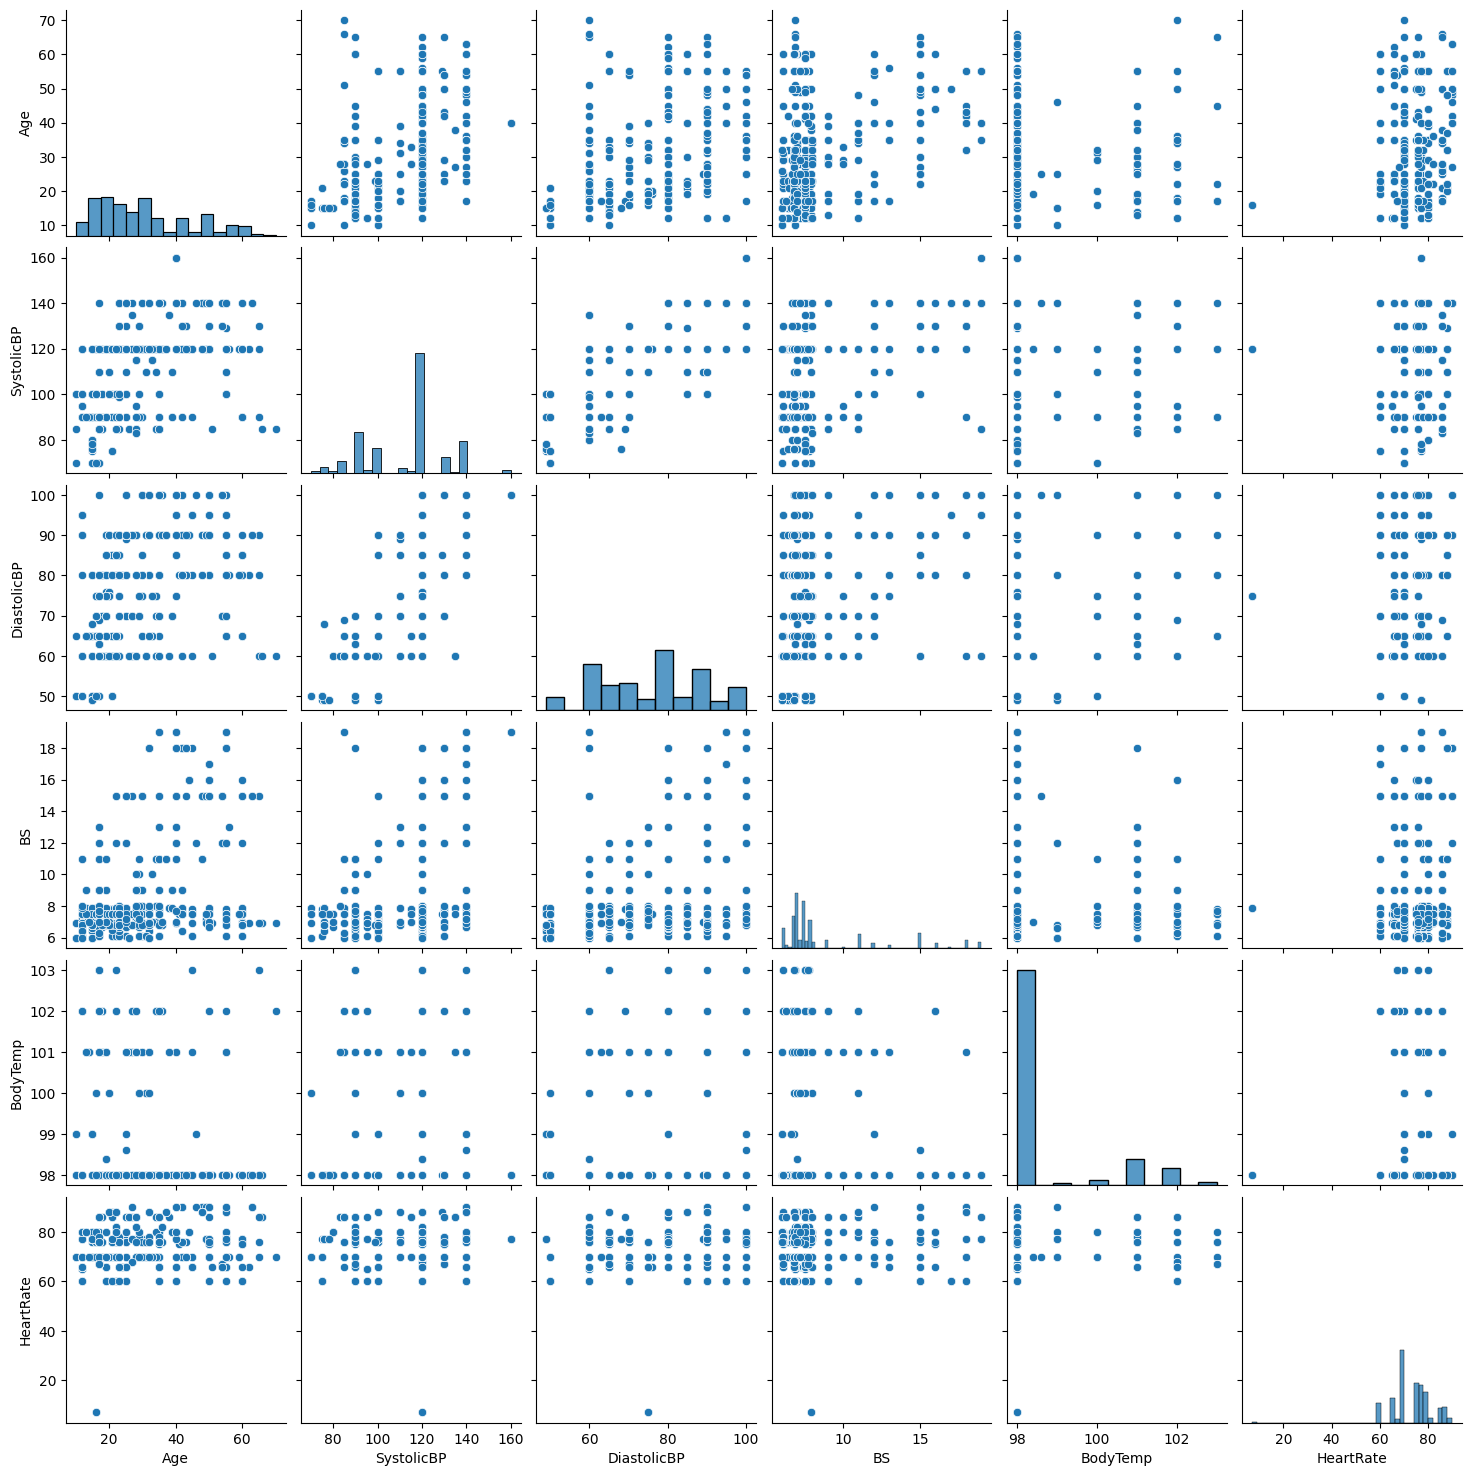

In [ ]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

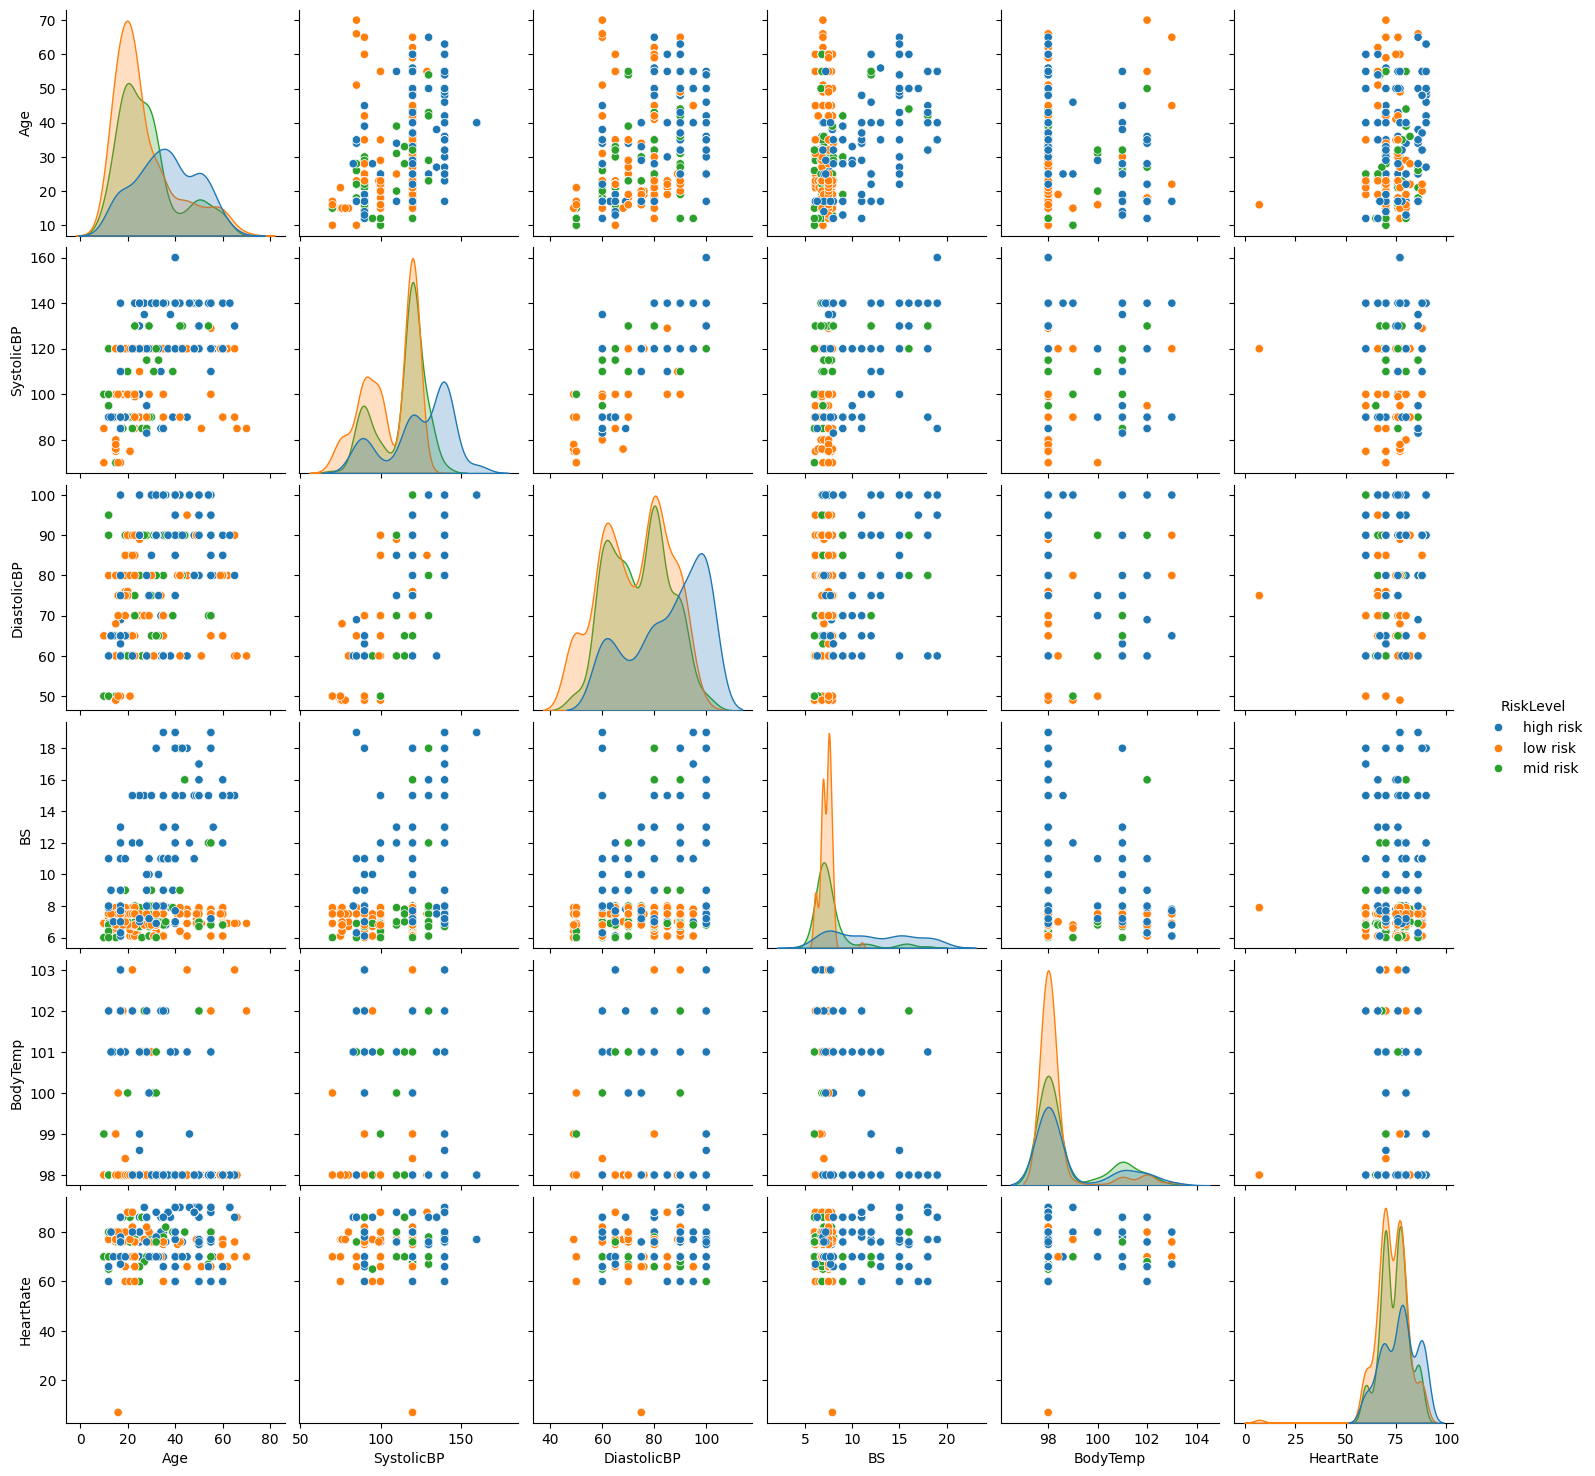

In [ ]:
# Scatter Plot com Seaborn - Variação 2 - Variação utilizando o atriburo de saída como parâmetro relacionando a distribuição de cores.

sns.pairplot(dataset, hue = "RiskLevel", height = 2.5);

Numa primeira análise gráfica, não conseguimos traçar uma correlação direta entre o nível de risco com os atributos. Excetua-se elevados núveis de glicose que apresentam maior incidência de maior nível de risco.

## 4. Pré-Processamento de dados

Nesta etapa, realizaram-se operações de preparação de dados, como avaliação e tratamento de valores missings (faltantes) e avaliação de limpeza de dados. Não criou-se uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Conforme verificado anteriormente, o datset não tem missings ou valores não preenchidos.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


<Axes: >

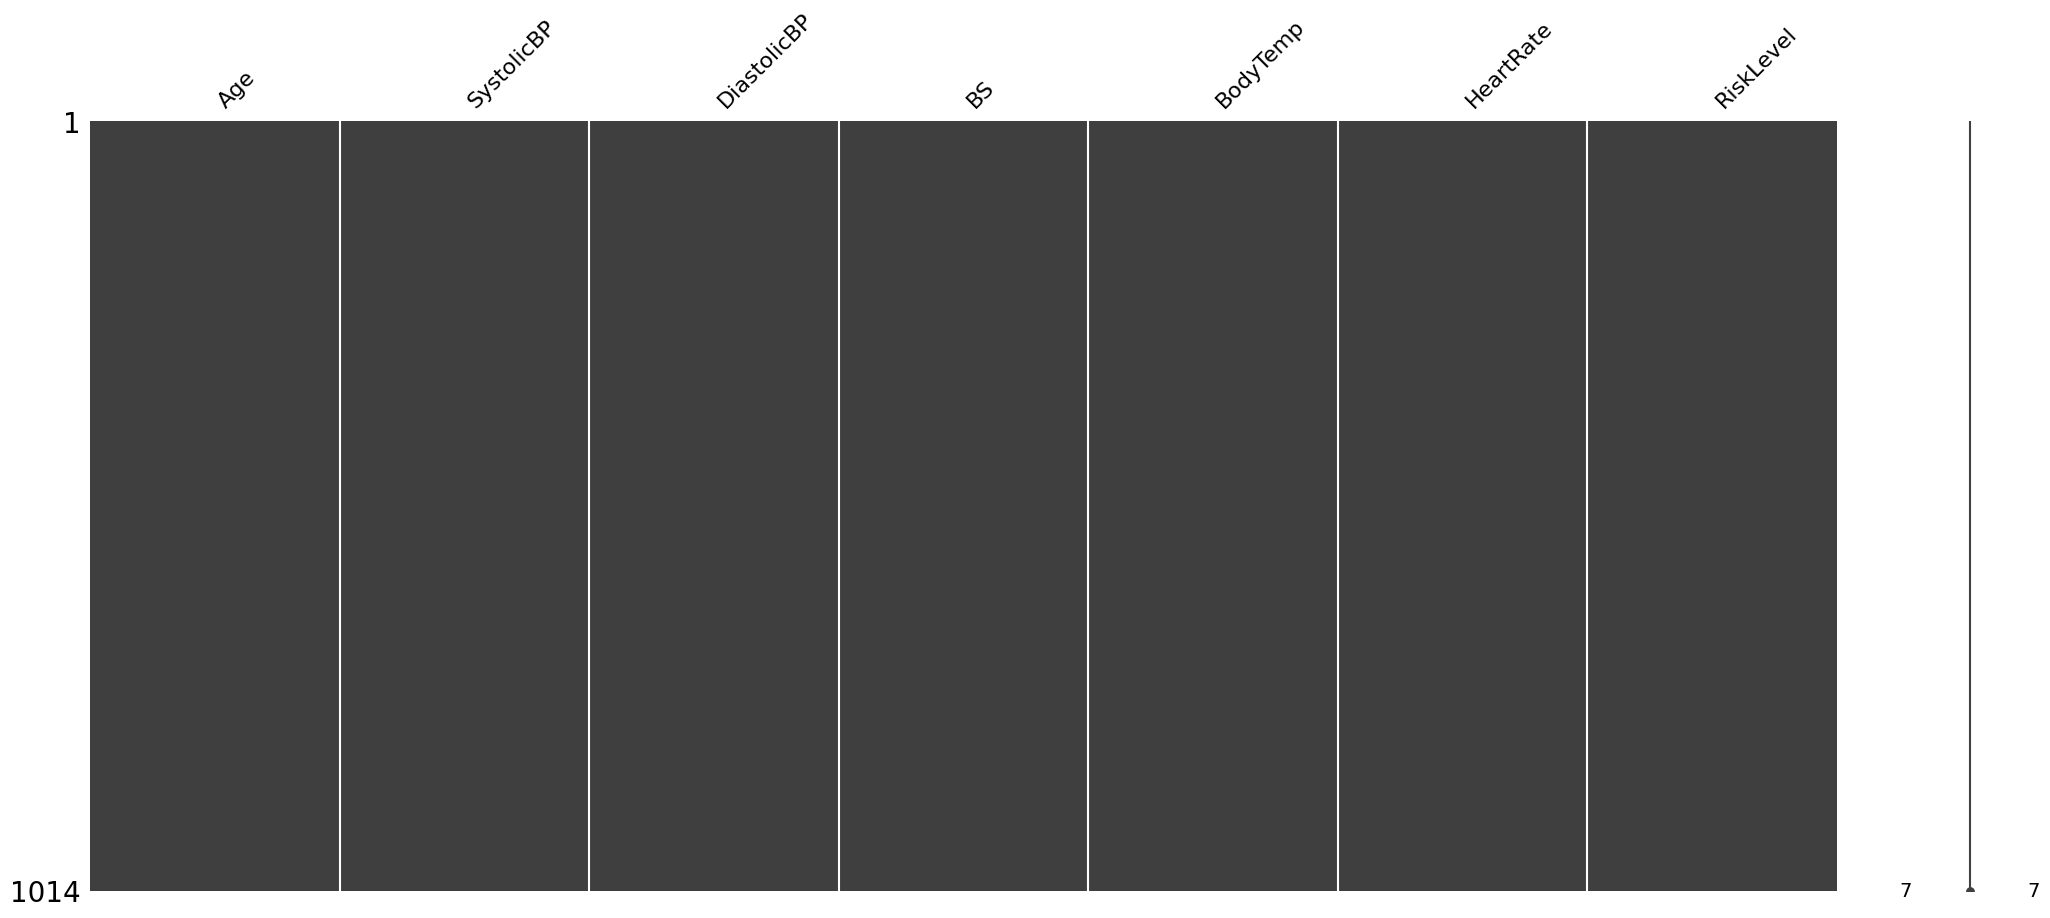

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset)

### 4.2. Separação em conjunto de treino e conjunto de teste

Como boa prática, usou-se um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que a se usar para verificar o quão boa foi a construção do modelo, e para dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos.

Utilizou-se 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

Primeiramente, foram definadas as colunas de atributos (X - 0 a 5) e qual a coluna das classes (Y - 6). Em seguida, especificou-se o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, separouse os conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:6] # atributos
y = array[:,6] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
scoring = 'accuracy'
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## Modelagem e Inferência

### 5.1 Criação e avaliação de modelos: linha de base

Iniciou-se a etapa de modelagem e inferência, analisando quais algoritmos de classificação performarão melhor no conjunto de dados de treino. Utilizou-se a validação cruzada com 10 *folds* (etapa anterior) para o treinamento, avaliando os modelos conforme a métrica acurácia.

Primeiramente, foram utilizados os algorítmos KNN, Árvore de Decisão, GaussianNB e SVC.

KNN: 0.660885 (0.030125)
CART: 0.802710 (0.036630)
NB: 0.584447 (0.030940)
SVM: 0.576980 (0.062216)


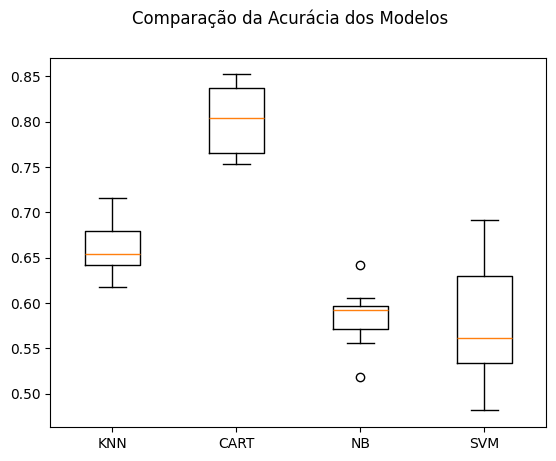

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(10)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Como resultado, o algorítmo de Árvore de Decisão apresentou melhor desempenho com acurária de 80,27% e desvio padrão de 3,7%.

A seguir traçando a linha de base, testou-se a acurácia do modelo nos dados de testes.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8571428571428571


Como resultado, o modelo apresentou uma acurácia de 85,7% sobre os dados de testes.

### 5.2 Criação e avaliação de modelos: com ensembles

A seguir, testou-se o refinamento do modelo, utilizando algoritmos de ensembles com a configuração padrão de hiperparâmetros da scikit-Learn, utilizando também a validação cruzada.

LR: 0.568 (0.056)
KNN: 0.661 (0.030)
CART: 0.803 (0.037)
NB: 0.584 (0.031)
SVM: 0.577 (0.062)
Bagging: 0.818 (0.040)
RF: 0.813 (0.050)
ET: 0.817 (0.034)
Ada: 0.619 (0.073)
GB: 0.777 (0.034)
Voting: 0.646 (0.053)


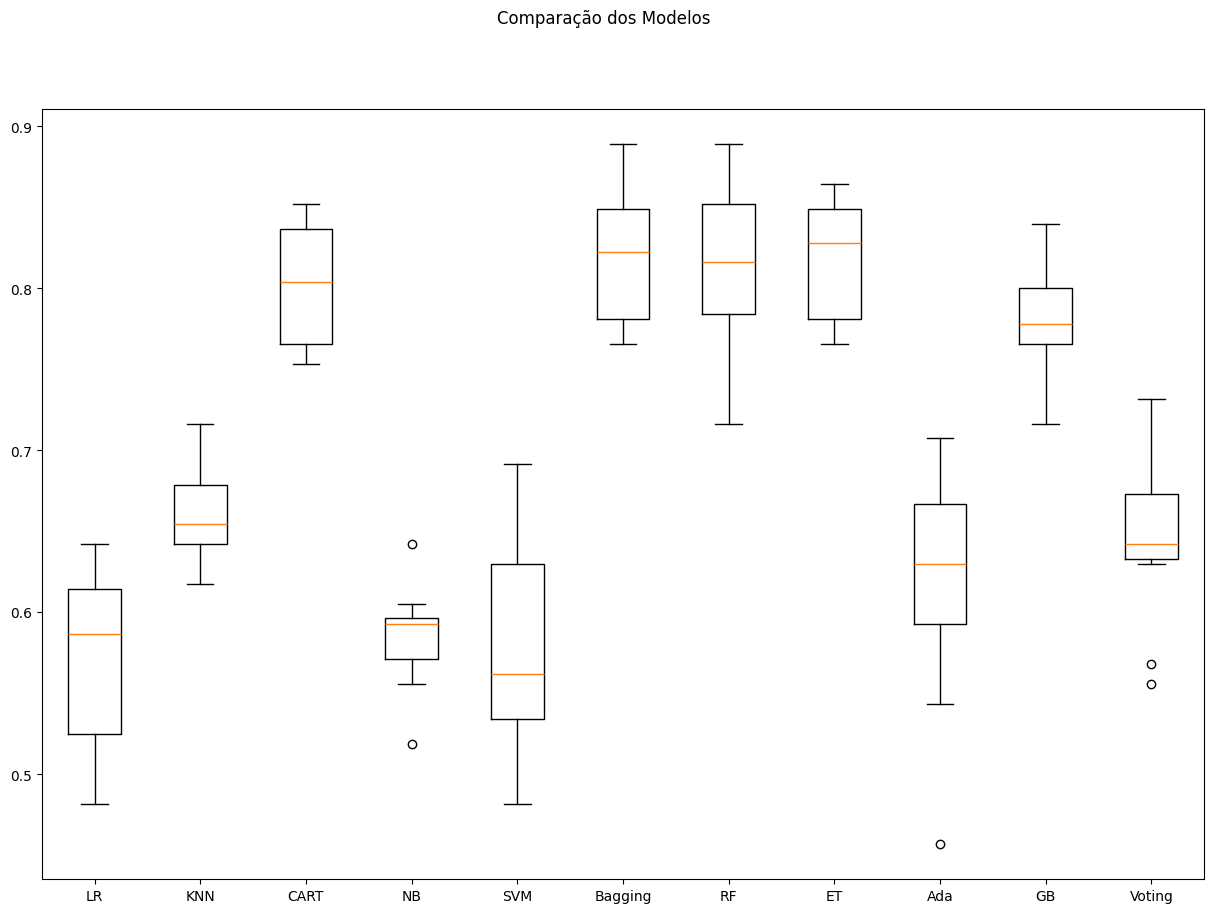

In [ ]:
np.random.seed(10) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Comparando os modelos, a utilização do algoritmo de classificação *BaggingClassifier* apresentou uma acurácia um pouco melhor que a Árvore de Decisão, com 81,8%.

### 5.3 Criação e avaliação de modelos: dados padronizados e normalizados

Em seguida, o processo foi repetido, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com dados padronizados e normalizados. A comparação é realizada entre as três versões: dataset de treino original, normalizado e padronizado.

LR-orig: 0.568 (0.056)
KNN-orig: 0.661 (0.030)
CART-orig: 0.803 (0.037)
NB-orig: 0.584 (0.031)
SVM-orig: 0.577 (0.062)
Bag-orig: 0.818 (0.040)
RF-orig: 0.813 (0.050)
ET-orig: 0.817 (0.034)
Ada-orig: 0.619 (0.073)
GB-orig: 0.777 (0.034)
Vot-orig: 0.646 (0.053)
LR-padr: 0.610 (0.052)
KNN-padr: 0.647 (0.038)
CART-padr: 0.804 (0.034)
NB-padr: 0.584 (0.031)
SVM-padr: 0.695 (0.036)
Bag-padr: 0.814 (0.045)
RF-padr: 0.825 (0.052)
ET-padr: 0.815 (0.039)
Ada-padr: 0.619 (0.073)
GB-padr: 0.777 (0.034)
Vot-padr: 0.705 (0.036)
LR-norm: 0.629 (0.048)
KNN-norm: 0.644 (0.049)
CART-norm: 0.805 (0.037)
NB-norm: 0.584 (0.031)
SVM-norm: 0.676 (0.037)
Bag-norm: 0.820 (0.047)
RF-norm: 0.824 (0.050)
ET-norm: 0.818 (0.030)
Ada-norm: 0.619 (0.073)
GB-norm: 0.777 (0.034)
Vot-norm: 0.695 (0.038)


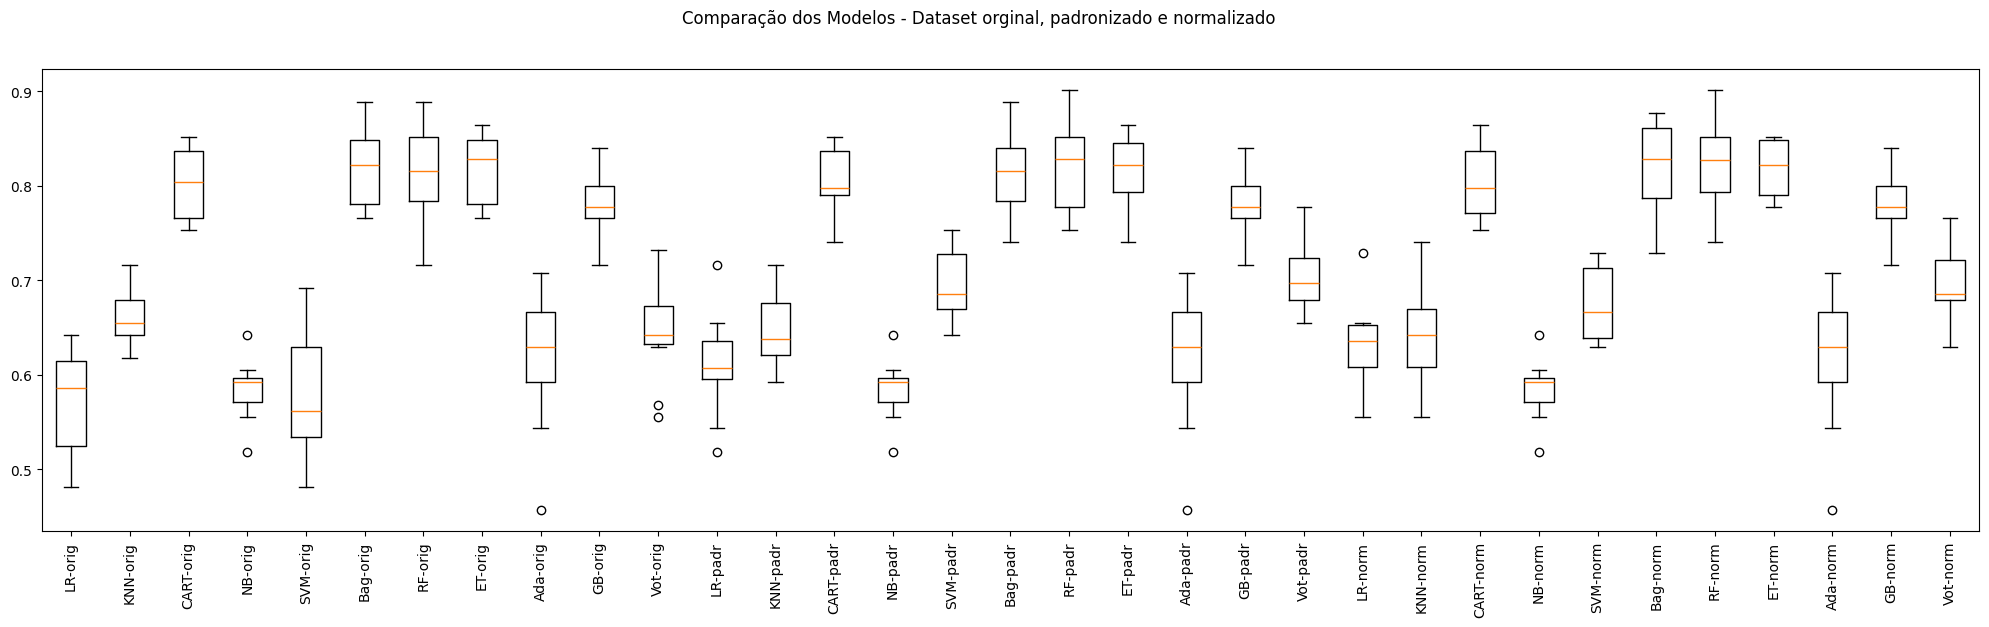

In [ ]:
np.random.seed(10) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Pela avaliação dos modelos, a *RandomForestClassifier* obteve uma maior acurácia, 82,5% com os dados padronizados. Optou-se, assim, em utilizá-lo para avaçiar a finalização do modelo.

### 5.4 Finalização do Modelo

A seguir, finaliza-se o modelo, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada), realizando predições para o conjunto de dados de testes separado na etapa de pré-processamento.

Primeiro os dados de entrada foram padronizados, treinados, exibindo em seguida a acurácia do teste.

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8768472906403941


Por meio do conjunto de testes, o modelo com *RandomForestClassifier* alcançou uma acurácia superior a 87% em dados não vistos. O resultado foi superior que a utilização do algorítmo *DecisionTreeClassifier*.



### 5.5 Simulando a aplicação do modelo em dados não vistos

Preparação do modelo para utilização em produção, com treino de todo o dataset.

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_features=3)

Simulação da aplicação do modelo em dados não vistos, com novas cinco instâncias, porém sem a classe de saída.

Será aplicado o modelo recém-treinado para fazer a predição das classes, sendo realizado a padronização dos dados na mesma escala dos dados usados em treinamento.

In [ ]:
data = {'Age':  [21, 34, 17, 30, 25],
        'SystolicBP': [131, 100, 110, 111, 130],
        'DiastolicBP': [50, 60, 50, 55, 80],
        'BS': [6.4, 6.9, 10.5, 6, 10],
        'BodyTemp': [98, 99, 98, 98, 98],
        'HeartRate': [86, 97, 90, 86, 86],
        }

atributos = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)

# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

['mid risk' 'low risk' 'high risk' 'low risk' 'high risk']


## Conclusão

A análise do conjunto de amostra de dados *Maternal Health Risk*, nesse estudo, proporcionou a avaliação das técnicas de análise e pré-processamento de dados e modelo de machine learning, baseados nos atributos de idade, pressão, batimentos cardíacos, glicose e frequência cartdiaca, classificando o risco da mãe em alto, médio ou baixo.

O problema em questão refere-se à classificação, realizando a análise e o tratamento de dados e a separação da massa de dados para um modelo de treino supervisionado em Python, baseado em conjunto de testes e treinamento.

A metodologia adotada para treino incluiu uma prática fundamental na análise de dados: a separação dos dados em dois grupos distintos — um conjunto de treinamento e um conjunto de teste. Utilizamos 80% do conjunto de dados para modelagem, enquanto reservamos 20% para testes, em uma estratégia conhecida como train-test-split. Essa abordagem é essencial, pois o conjunto de teste, também chamado de conjunto de validação na literatura, consiste em uma amostra dos dados que não é utilizada na construção inicial do modelo. Ele serve para confirmar a precisão do modelo final, oferecendo uma perspectiva valiosa sobre como o modelo irá se comportar em dados não vistos, garantindo assim a generalização do aprendizado.

Para avaliação do modelo, utilizou-se validação cruzada com a biblioteca *Pipeline* para criar modelos com dados padronizados e normalizados (evitando data leakage) e comparando os modelos treinados com o *dataset* original.

Por fim, através do conjunto de testes, verficou-se que o modelo com o classificador *RandomForestClassifier* com dados padronizados alcançou uma acurácia superior a 87% em dados não vistos. O resultado foi superior que a utilização do algorítmo *DecisionTreeClassifier* no *dataset* original. Assim, o modelo foi treinado utilizando todo o *dataset* padronizado, e testado sob dados não existentes para verificação da classificação.